In [21]:
import csv
import time
import threading
import psychopy
import pylsl
psychopy.useVersion('2022.1.0')
from pylsl import StreamInfo, StreamInlet

import csv
import time
import threading
from pylsl import StreamInfo, StreamInlet

# Function to read data from the device and write it to a CSV file
def stream_and_save_data(device_inlet, csv_filename, duration_seconds, sampling_rate):
    num_samples = int(duration_seconds * sampling_rate)
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        for _ in range(num_samples):
            sample, timestamp = device_inlet.pull_sample()
            # Modify this part to extract the relevant data from 'sample'
            # For example: data = sample[0]  # Assuming 'sample' is a list or array
            data = sample  # Modify this line to extract the desired data
            csv_writer.writerow(data)
            time.sleep(1.0 / sampling_rate)  # Adjust the sleep duration based on the sampling rate

def main():
    # Set up LabStreamingLayer stream
    streams_EEG = pylsl.resolve_byprop("name", "Crown-215", timeout=15)

    if len(streams_EEG) == 0:
        print("Could not find stream on the network.")
        return

    eeg_inlet = pylsl.StreamInlet(streams_EEG[0])

    # Define the duration in seconds to save
    duration_seconds = 20

    # Define the sampling rate (e.g., 256 Hz for 256 samples per second)
    sampling_rate = 256

    # Create a CSV file to store the data
    csv_filename = 'eeg_data_dark2.csv'

    # Start a thread to stream and save data
    data_thread = threading.Thread(
        target=stream_and_save_data,
        args=(eeg_inlet, csv_filename, duration_seconds, sampling_rate)
    )
    data_thread.start()

    # Continue with your main experiment code here

if __name__ == "__main__":
    main()

2023-09-14 00:15:08.903 (7741.052s) [R_Crown-215     ]      data_receiver.cpp:344    ERR| Stream transmission broke off (Input stream error.); re-connecting...


In [6]:
!socat -d -d UDP-RECV:16571,reuseaddr,broadcast STDOUT

2023/09/13 23:16:16 socat[3736] N using stdout for reading and writing
2023/09/13 23:16:16 socat[3736] N starting data transfer loop with FDs [5,5] and [1,1]
^C
2023/09/13 23:16:39 socat[3736] N socat_signal(): handling signal 2
2023/09/13 23:16:39 socat[3736] N exiting on signal 2
2023/09/13 23:16:39 socat[3736] N socat_signal(): finishing signal 2
2023/09/13 23:16:39 socat[3736] N exit(130)


In [10]:
import csv
import time
import threading
from pylsl import StreamInfo, StreamInlet

# Function to read data from the device and write it to a CSV file
def stream_and_save_data(device_inlet, csv_filename, duration_seconds, sampling_rate):
    num_samples = int(duration_seconds * sampling_rate)
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        for _ in range(num_samples):
            sample, timestamp = device_inlet.pull_sample()
            # Modify this part to extract the relevant data from 'sample'
            # For example: data = sample[0]  # Assuming 'sample' is a list or array
            data = sample  # Modify this line to extract the desired data
            csv_writer.writerow(data)
            time.sleep(1.0 / sampling_rate)  # Adjust the sleep duration based on the sampling rate

def main():
    # Set up LabStreamingLayer stream
    streams_EEG = pylsl.resolve_byprop("name", "Crown-215", timeout=5)

    if len(streams_EEG) == 0:
        print("Could not find stream on the network.")
        return

    eeg_inlet = pylsl.StreamInlet(streams_EEG[0])

    # Define the duration in seconds to save
    duration_seconds = 20

    # Define the sampling rate (e.g., 256 Hz for 256 samples per second)
    sampling_rate = 256

    # Create a CSV file to store the data
    csv_filename = 'eeg_data.csv'

    # Start a thread to stream and save data
    data_thread = threading.Thread(
        target=stream_and_save_data,
        args=(eeg_inlet, csv_filename, duration_seconds, sampling_rate)
    )
    data_thread.start()

    # Continue with your main experiment code here

if __name__ == "__main__":
    main()


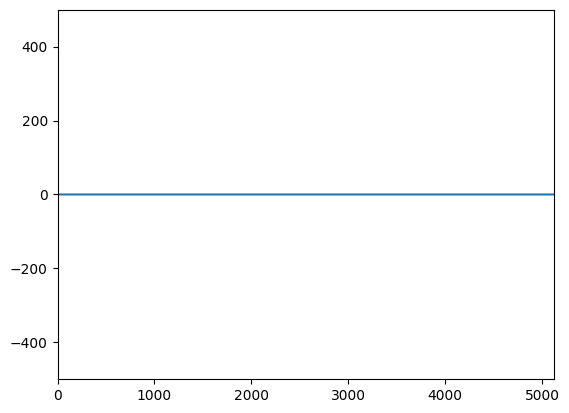

In [15]:
import csv
import time
import threading
import numpy as np
import matplotlib.pyplot as plt
from pylsl import StreamInfo, StreamInlet

# Function to read data from the device and write it to a CSV file
def stream_and_visualize_data(device_inlet, duration_seconds, sampling_rate):
    num_samples = int(duration_seconds * sampling_rate)
    data = []
    timestamps = []
    
    # Create a figure for real-time plotting
    plt.ion()  # Turn on interactive mode for Matplotlib
    fig, ax = plt.subplots()
    x = np.arange(0, num_samples)
    line, = ax.plot(x, np.zeros(num_samples))

    ax.set_xlim(0, num_samples)
    ax.set_ylim(-500, 500)  # Adjust the y-axis limits based on your expected data range

    for _ in range(num_samples):
        sample, timestamp = device_inlet.pull_sample()
        data.append(sample)  # Store the sample data
        timestamps.append(timestamp)

        if len(data) > num_samples:
            data.pop(0)
            timestamps.pop(0)

        # Update the real-time plot
        line.set_ydata(data)
        fig.canvas.flush_events()

        time.sleep(1.0 / sampling_rate)  # Adjust the sleep duration based on the sampling rate

    # Close the real-time plot window when done
    plt.ioff()
    plt.show()

def main():
    # Set up LabStreamingLayer stream
    streams_EEG = pylsl.resolve_byprop("name", "Crown-215", timeout=5)

    if len(streams_EEG) == 0:
        print("Could not find stream on the network.")
        return

    eeg_inlet = pylsl.StreamInlet(streams_EEG[0])

    # Define the duration in seconds to visualize
    duration_seconds = 20

    # Define the sampling rate (e.g., 256 Hz for 256 samples per second)
    sampling_rate = 256

    # Start a thread to stream and visualize data
    data_thread = threading.Thread(
        target=stream_and_visualize_data,
        args=(eeg_inlet, duration_seconds, sampling_rate)
    )
    data_thread.start()

    # Continue with your main experiment code here

if __name__ == "__main__":
    main()


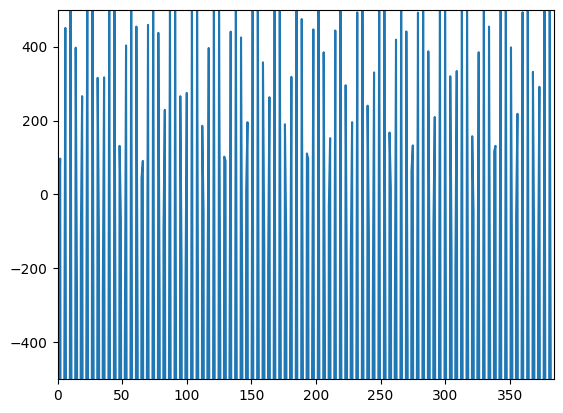

In [14]:
import csv
import time
import threading
import numpy as np
import matplotlib.pyplot as plt
from pylsl import StreamInfo, StreamInlet

# Function to read data from the device and write it to a CSV file
def stream_and_visualize_data(device_inlet, duration_seconds, sampling_rate):
    num_samples = int(duration_seconds * sampling_rate)
    data = np.zeros(num_samples)  # Initialize data as a NumPy array
    timestamps = []

    # Create a figure for real-time plotting
    plt.ion()  # Turn on interactive mode for Matplotlib
    fig, ax = plt.subplots()
    x = np.arange(0, num_samples)
    line, = ax.plot(x, data)

    ax.set_xlim(0, num_samples)
    ax.set_ylim(-500, 500)  # Adjust the y-axis limits based on your expected data range

    for i in range(num_samples):
        sample, timestamp = device_inlet.pull_sample()
        data[i] = sample[0]  # Assuming 'sample' is a list or array; modify as needed
        timestamps.append(timestamp)

        # Update the real-time plot
        line.set_ydata(data)
        fig.canvas.flush_events()

        time.sleep(1.0 / sampling_rate)  # Adjust the sleep duration based on the sampling rate

    # Close the real-time plot window when done
    plt.ioff()
    plt.show()

def main():
    # Set up LabStreamingLayer stream
    streams_EEG = pylsl.resolve_byprop("name", "Crown-215", timeout=5)

    if len(streams_EEG) == 0:
        print("Could not find stream on the network.")
        return

    eeg_inlet = pylsl.StreamInlet(streams_EEG[0])

    # Define the duration in seconds to visualize
    duration_seconds = 1.5  # Reduce the duration for quick testing

    # Define the sampling rate (e.g., 256 Hz for 256 samples per second)
    sampling_rate = 256

    # Start a thread to stream and visualize data
    data_thread = threading.Thread(
        target=stream_and_visualize_data,
        args=(eeg_inlet, duration_seconds, sampling_rate)
    )
    data_thread.start()

    # Allow a brief delay before exiting
    time.sleep(duration_seconds + 2)  # Adjust the delay time as needed

if __name__ == "__main__":
    main()


In [ ]:
import csv
import time
import threading
import numpy as np
import matplotlib.pyplot as plt
from pylsl import StreamInfo, StreamInlet

# Function to read data from the device and write it to a CSV file
def stream_and_visualize_data(device_inlet, duration_seconds, sampling_rate):
    num_samples = int(duration_seconds * sampling_rate)
    data = []
    timestamps = []
    
    # Create a figure for real-time plotting
    plt.ion()  # Turn on interactive mode for Matplotlib
    fig, ax = plt.subplots()
    x = np.arange(0, num_samples)
    line, = ax.plot(x, np.zeros(num_samples))

    ax.set_xlim(0, num_samples)
    ax.set_ylim(-500, 500)  # Adjust the y-axis limits based on your expected data range

    for _ in range(num_samples):
        sample, timestamp = device_inlet.pull_sample()
        data.append(sample)  # Store the sample data
        timestamps.append(timestamp)

        if len(data) > num_samples:
            data.pop(0)
            timestamps.pop(0)

        # Update the real-time plot
        line.set_ydata(data)
        fig.canvas.flush_events()

        time.sleep(1.0 / sampling_rate)  # Adjust the sleep duration based on the sampling rate

    # Close the real-time plot window when done
    plt.ioff()
    plt.show()

def main():
    # Set up LabStreamingLayer stream
    streams_EEG = pylsl.resolve_byprop("name", "Crown-215", timeout=5)

    if len(streams_EEG) == 0:
        print("Could not find stream on the network.")
        return

    eeg_inlet = pylsl.StreamInlet(streams_EEG[0])

    # Define the duration in seconds to visualize
    duration_seconds = 1.5  # Reduce the duration for quick testing

    # Define the sampling rate (e.g., 256 Hz for 256 samples per second)
    sampling_rate = 256

    # Start a thread to stream and visualize data
    data_thread = threading.Thread(
        target=stream_and_visualize_data,
        args=(eeg_inlet, duration_seconds, sampling_rate)
    )
    data_thread.start()

    # Allow a brief delay before exiting
    time.sleep(duration_seconds + 2)  # Adjust the delay time as needed

if __name__ == "__main__":
    main()


In [ ]:
import pandas as pd

# Load EEG data from CSV files
eeg_open_df = pd.read_csv('eeg_data_test.csv')
eeg_closed_df = pd.read_csv('eeg_data_dark1.csv')
import matplotlib.pyplot as plt



Creating RawArray with float64 data, n_channels=8, n_times=5120
    Range : 0 ... 5119 =      0.000 ...    19.996 secs
Ready.


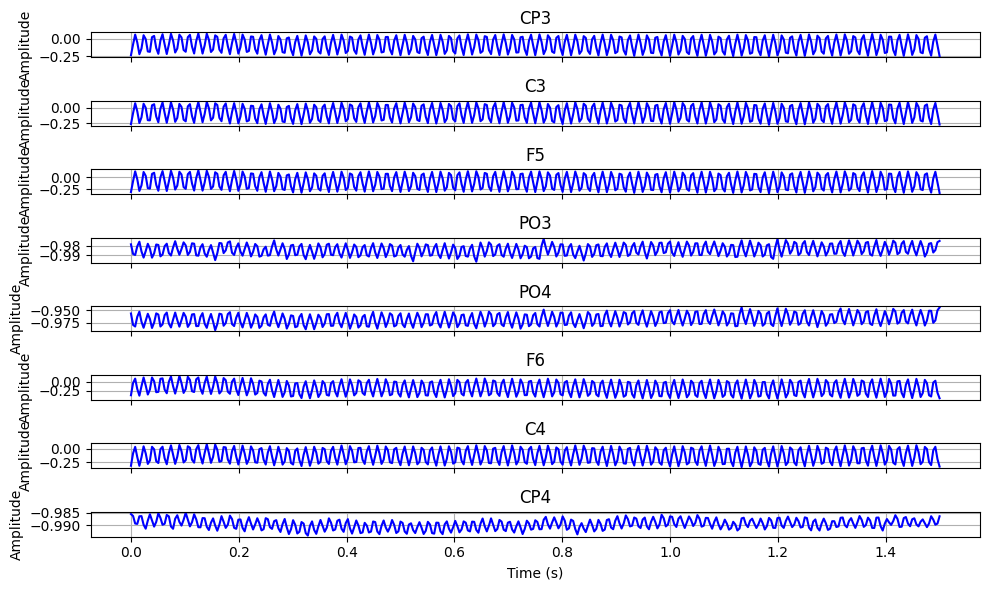

In [60]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
eeg_data = pd.read_csv('eeg_data_test3.csv', header=None).values
eeg_data_mv = eeg_data / 1e6
# Scale the EEG data to the desired range (e.g., -1 to 1)
eeg_data_mv = eeg_data_mv / (np.max(np.abs(eeg_data_mv), axis=0))

# Define channel names (replace with your channel names)
channel_names = ["CP3", "C3", "F5", "PO3", "PO4", "F6", "C4", "CP4"]

# Define the sampling frequency (e.g., 1000 Hz for 1 kHz data)
sfreq = 256

# Create an info object
info = mne.create_info(channel_names, sfreq)

# Create an MNE Raw object
raw = mne.io.RawArray(eeg_data_mv.T, info)

# Define the time range you want to plot (start and end in seconds)
start_time = 3
end_time = 4.5

# Select the data within the specified time range
raw.crop(tmin=start_time, tmax=end_time)

# Create a custom plot
fig, axes = plt.subplots(nrows=len(channel_names), ncols=1, figsize=(10, 6), sharex=True)

for i, ch_name in enumerate(channel_names):
    ax = axes[i]
    data, times = raw[ch_name, :]
    ax.plot(times, data.T, color='b')
    ax.set_title(ch_name)
    ax.set_ylabel('Amplitude')
    ax.grid(True)

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


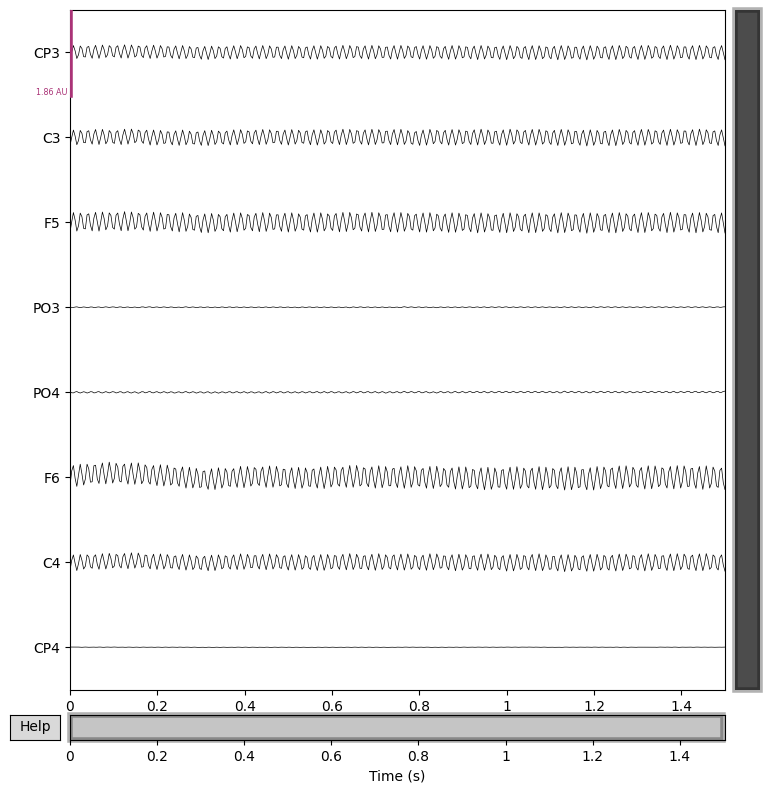

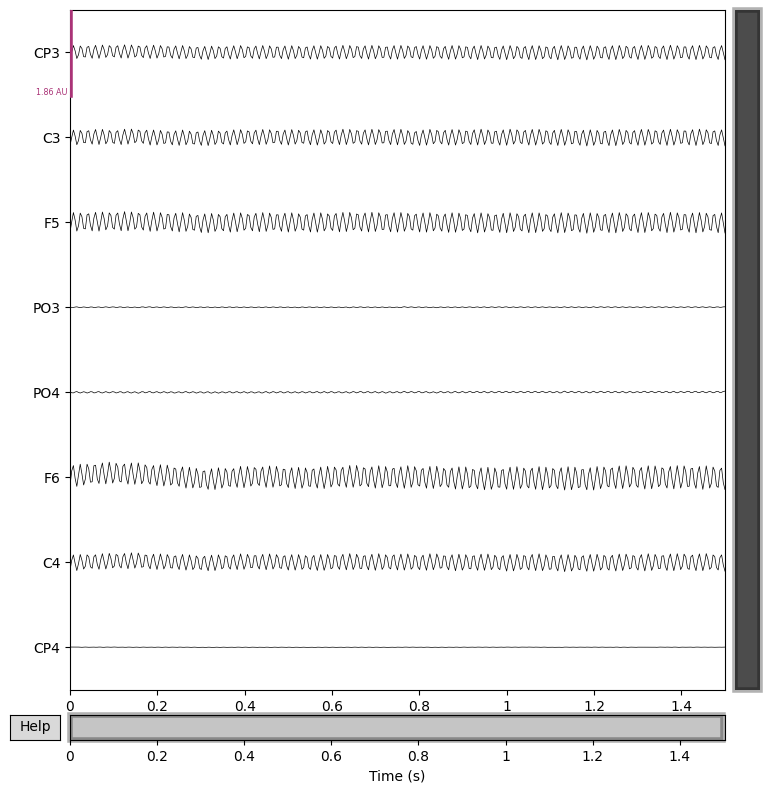

In [61]:
raw.plot()

In [ ]:
#psd 
#
